In [1]:
import os
import torch 
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image

In [2]:
# constants
NUM_EPOCHS = 50
LEARNING_RATE = 1e-3
BATCH_SIZE = 128
# image transformations
transform = transforms.Compose([
    
    transforms.ToTensor(),
])

In [3]:
# trainset = datasets.FashionMNIST(
#     root='./data',
#     train=True, 
#     download=True,
#     transform=transform
# )
# testset = datasets.FashionMNIST(
#     root='./data',
#     train=False,
#     download=True,
#     transform=transform
# )

trainset = datasets.MNIST(
    root='./data1',
    train=True, 
    download=True,
    transform=transform
)
testset = datasets.MNIST(
    root='./data1',
    train=False,
    download=True,
    transform=transform
)
trainloader = DataLoader(
    trainset, 
    batch_size=BATCH_SIZE,
    shuffle=True
)
testloader = DataLoader(
    testset, 
    batch_size=BATCH_SIZE, 
    shuffle=True
)

Extracting ./data1/MNIST/raw/train-images-idx3-ubyte.gz to ./data1/MNIST/raw


Extracting ./data1/MNIST/raw/train-labels-idx1-ubyte.gz to ./data1/MNIST/raw


Extracting ./data1/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data1/MNIST/raw


Extracting ./data1/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data1/MNIST/raw
Processing...
Done!


/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
# utility functions
def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device
def make_dir():
    image_dir = 'FashionMNIST_Images'
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)
def save_decoded_image(img, epoch):
    img = img.view(img.size(0), 1, 28, 28)
    save_image(img, './FashionMNIST_Images/linear_ae_image{}.png'.format(epoch))

In [5]:
# class Autoencoder(nn.Module):
#     def __init__(self):
#         super(Autoencoder, self).__init__()
#         # encoder
#         self.enc1 = nn.Linear(in_features=784, out_features=256)
#         self.enc2 = nn.Linear(in_features=256, out_features=128)
#         self.enc3 = nn.Linear(in_features=128, out_features=64)
#         self.enc4 = nn.Linear(in_features=64, out_features=32)
#         self.enc5 = nn.Linear(in_features=32, out_features=16)
#         # decoder 
#         self.dec1 = nn.Linear(in_features=16, out_features=32)
#         self.dec2 = nn.Linear(in_features=32, out_features=64)
#         self.dec3 = nn.Linear(in_features=64, out_features=128)
#         self.dec4 = nn.Linear(in_features=128, out_features=256)
#         self.dec5 = nn.Linear(in_features=256, out_features=784)
#     def forward(self, x):
#         x = F.relu(self.enc1(x))
#         x = F.relu(self.enc2(x))
#         x = F.relu(self.enc3(x))
#         x = F.relu(self.enc4(x))
#         code = F.relu(self.enc5(x))
#         x = F.relu(self.dec1(code))
#         x = F.relu(self.dec2(x))
#         x = F.relu(self.dec3(x))
#         x = F.relu(self.dec4(x))
#         x = F.relu(self.dec5(x))
#         return x, code
    
    
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(in_features=784, out_features=256),
            nn.ReLU(),
            nn.Linear(in_features=256, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=16))

        # decoder 
        self.dec1 = nn.Linear(in_features=16, out_features=32)
        self.dec2 = nn.Linear(in_features=32, out_features=64)
        self.dec3 = nn.Linear(in_features=64, out_features=128)
        self.dec4 = nn.Linear(in_features=128, out_features=256)
        self.dec5 = nn.Linear(in_features=256, out_features=784)
    def forward(self, x):

        code = self.encoder(x)
        x = F.relu(self.dec1(code))
        x = F.relu(self.dec2(x))
        x = F.relu(self.dec3(x))
        x = F.relu(self.dec4(x))
        x = F.relu(self.dec5(x))
        return x, code
net = Autoencoder()
print(net)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=16, bias=True)
  )
  (dec1): Linear(in_features=16, out_features=32, bias=True)
  (dec2): Linear(in_features=32, out_features=64, bias=True)
  (dec3): Linear(in_features=64, out_features=128, bias=True)
  (dec4): Linear(in_features=128, out_features=256, bias=True)
  (dec5): Linear(in_features=256, out_features=784, bias=True)
)


In [6]:
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)

In [7]:
def train(net, trainloader, NUM_EPOCHS):
    train_loss = []
    for epoch in range(NUM_EPOCHS):
        running_loss = 0.0
        for data in trainloader:
            img, _ = data
            img = img.to(device)
            img = img.view(img.size(0), -1)
            optimizer.zero_grad()
            outputs , code= net(img)
            loss = criterion(outputs, img)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        loss = running_loss / len(trainloader)
        train_loss.append(loss)
        print('Epoch {} of {}, Train Loss: {:.3f}'.format(
            epoch+1, NUM_EPOCHS, loss))
        if epoch % 5 == 0:
            save_decoded_image(outputs.cpu().data, epoch)
    return train_loss
def test_image_reconstruction(net, testloader):
     for batch in testloader:
        img, _ = batch
        img = img.to(device)
        img = img.view(img.size(0), -1)
        outputs = net(img)
        outputs = outputs.view(outputs.size(0), 1, 28, 28).cpu().data
        save_image(outputs, 'fashionmnist_reconstruction.png')
        break

In [8]:
device = get_device()
print(device)
# load the neural network onto the device
net.to(device)
make_dir()
# train the network
train_loss = train(net, trainloader, NUM_EPOCHS)

cuda:0
Epoch 1 of 50, Train Loss: 0.061
Epoch 2 of 50, Train Loss: 0.037
Epoch 3 of 50, Train Loss: 0.030
Epoch 4 of 50, Train Loss: 0.027
Epoch 5 of 50, Train Loss: 0.025
Epoch 6 of 50, Train Loss: 0.023
Epoch 7 of 50, Train Loss: 0.022
Epoch 8 of 50, Train Loss: 0.021
Epoch 9 of 50, Train Loss: 0.021
Epoch 10 of 50, Train Loss: 0.021
Epoch 11 of 50, Train Loss: 0.020
Epoch 12 of 50, Train Loss: 0.020
Epoch 13 of 50, Train Loss: 0.020
Epoch 14 of 50, Train Loss: 0.019
Epoch 15 of 50, Train Loss: 0.019
Epoch 16 of 50, Train Loss: 0.018
Epoch 17 of 50, Train Loss: 0.018
Epoch 18 of 50, Train Loss: 0.018
Epoch 19 of 50, Train Loss: 0.018
Epoch 20 of 50, Train Loss: 0.018
Epoch 21 of 50, Train Loss: 0.017
Epoch 22 of 50, Train Loss: 0.017
Epoch 23 of 50, Train Loss: 0.017
Epoch 24 of 50, Train Loss: 0.017
Epoch 25 of 50, Train Loss: 0.016
Epoch 26 of 50, Train Loss: 0.016
Epoch 27 of 50, Train Loss: 0.016
Epoch 28 of 50, Train Loss: 0.016
Epoch 29 of 50, Train Loss: 0.016
Epoch 30 of 50, 

In [ ]:
# class ActivationsAndGradients:
#     """ Class for extracting activations and
#     registering gradients from targetted intermediate layers """

#     def __init__(self, model, target_layer):
#         self.model = model
#         self.gradients = []
#         self.activations = []
#         print(target_layer)
#         target_layer.register_forward_hook(self.save_activation)
#         target_layer.register_backward_hook(self.save_gradient)

#     def save_activation(self, module, input, output):
#         print(f"save input {len(input)}, output {output.shape}")
#         activation = output
#         self.activations.append(activation.cpu().detach())

#     def save_gradient(self, module, grad_input, grad_output):
#         print(f"grad input {grad_input[0].shape}, output {grad_output[0].shape}")
#         # Gradients are computed in reverse order
#         grad = grad_output[0]
#         self.gradients = [grad.cpu().detach()] + self.gradients

#     def __call__(self, x):
#         self.gradients = []
#         self.activations = []        
#         return self.model(x)

# activations_and_grads = ActivationsAndGradients(net,net.encoder[0])

In [9]:
all_code = []
all_labels = []
for batch in trainloader:
    img, label = batch
    img = img.to(device)
    img = img.view(img.size(0), -1)
    outputs, code = net(img)
    all_code.extend(code.detach().cpu().numpy())
    all_labels.extend(label.numpy())

In [ ]:
# all_code = []
# all_labels = []
# for batch in testloader:
#     img, label = batch
#     img = img.to(device)
#     img = img.view(img.size(0), -1)
#     outputs, code = net(img)
#     all_code.extend(code.detach().cpu().numpy())
#     all_labels.extend(label.numpy())
#     outputs = outputs.view(outputs.size(0), 1, 28, 28).cpu().data

In [10]:
all_labels = np.stack(all_labels)
all_code= np.stack(all_code)
all_code.shape

(60000, 16)

In [11]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

In [12]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(all_code)

In [13]:
kmeans.cluster_centers_.shape

(10, 16)

In [14]:
adjusted_rand_score(all_labels, kmeans.labels_)

0.45313763067537016

In [15]:
net

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=16, bias=True)
  )
  (dec1): Linear(in_features=16, out_features=32, bias=True)
  (dec2): Linear(in_features=32, out_features=64, bias=True)
  (dec3): Linear(in_features=64, out_features=128, bias=True)
  (dec4): Linear(in_features=128, out_features=256, bias=True)
  (dec5): Linear(in_features=256, out_features=784, bias=True)
)

In [34]:
for data in trainloader:
    img, label = data
    img = img[:1]
    label = label[:1]
    print(f"Label : {label}")
    img = img.to(device)
    img = img.view(img.size(0), -1)
    break
    

Label : tensor([8])


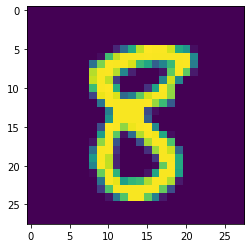

In [35]:
optimizer.zero_grad()
outputs , code= net(img)
loss = criterion(outputs, img)
loss.backward(retain_graph = True)

w = net.encoder[0].weight.detach().cpu().mean(dim=0).numpy()
g = net.encoder[0].weight.grad.detach().cpu().mean(dim=0).numpy()
wa = (net.encoder[0].weight*net.encoder[0].weight.grad).detach().cpu().mean(dim=0).numpy()
plt.imshow(img[0].cpu().numpy().reshape(28, 28))

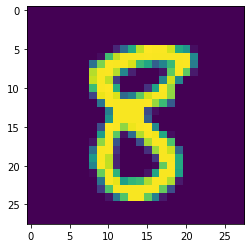

In [36]:
optimizer.zero_grad()
outputs , code= net(img)
pred = kmeans.predict(code.detach().cpu().numpy())
center = torch.FloatTensor(kmeans.cluster_centers_[pred[0]].reshape(1, -1)).to(device)
mse = nn.MSELoss()
loss1 =mse(code,center )
loss1.backward(retain_graph = True)

w1 = net.encoder[0].weight.detach().cpu().mean(dim=0).numpy()
g1 = net.encoder[0].weight.grad.detach().cpu().mean(dim=0).numpy()
wa1 = (net.encoder[0].weight*net.encoder[0].weight.grad).detach().cpu().mean(dim=0).numpy()
plt.imshow(img[0].cpu().numpy().reshape(28, 28))

Correct cluster = [2]


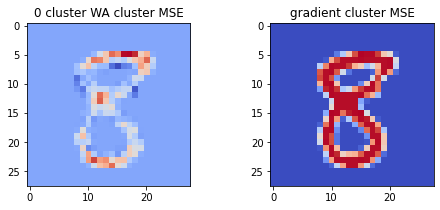

Correct cluster = [2]


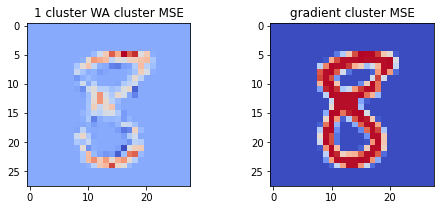

Correct cluster = [2]


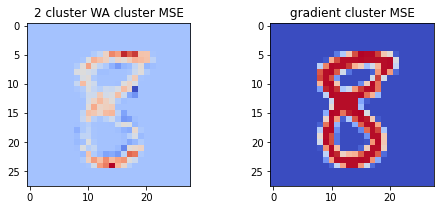

Correct cluster = [2]


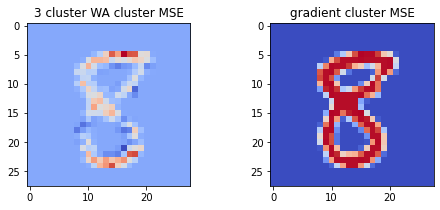

Correct cluster = [2]


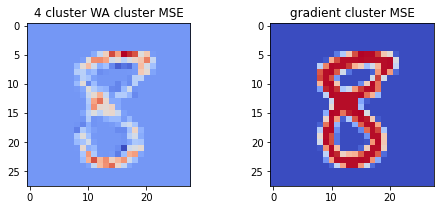

Correct cluster = [2]


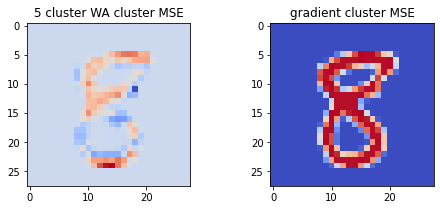

Correct cluster = [2]


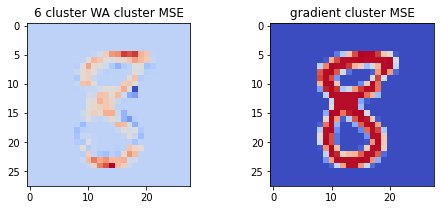

Correct cluster = [2]


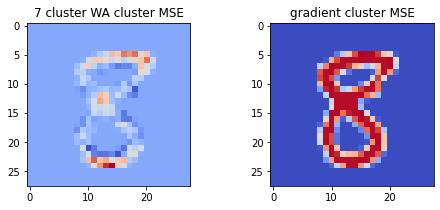

Correct cluster = [2]


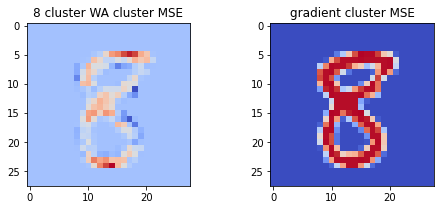

Correct cluster = [2]


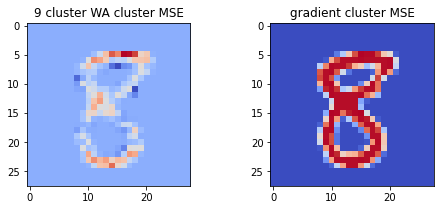

In [37]:
g1s = []
wa1s = []
for c in range(10):
    optimizer.zero_grad()
    outputs , code= net(img)
    pred = kmeans.predict(code.detach().cpu().numpy())
    print(f"Correct cluster = {pred}")
    center = torch.FloatTensor(kmeans.cluster_centers_[c].reshape(1, -1)).to(device)
    mse = nn.MSELoss()
    loss1 =mse(code,center )
    loss1.backward(retain_graph = True)
    
    w1 = net.encoder[0].weight.detach().cpu().mean(dim=0).numpy()
    g1 = net.encoder[0].weight.grad.detach().cpu().mean(dim=0).numpy()
    wa1 = (net.encoder[0].weight*net.encoder[0].weight.grad).detach().cpu().mean(dim=0).numpy()

    g1s.append(g1)
    wa1s.append(wa1)
    plt.figure(figsize = (8, 3))
    plt.subplot(121)
    plt.title(f"{c} cluster WA cluster MSE")
    plt.imshow(wa1.reshape(28, 28), cmap = "coolwarm")

    plt.subplot(122)
    plt.title("gradient cluster MSE")
    plt.imshow(g1.reshape(28, 28), cmap = "coolwarm")
    plt.show()

    

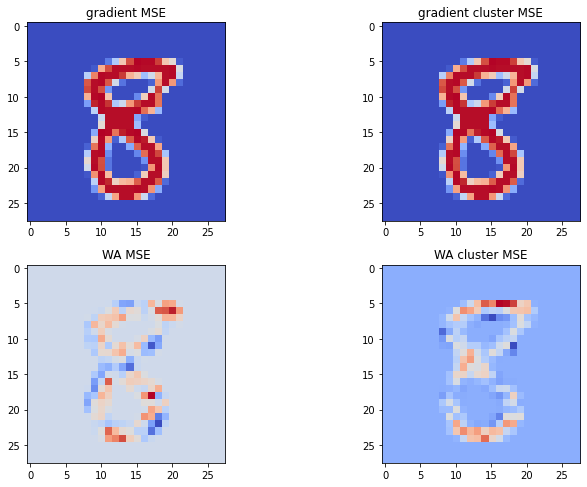

In [38]:
plt.figure(figsize = (10,10))
plt.subplot(321)
plt.title("gradient MSE")
plt.imshow(g.reshape(28, 28), cmap = "coolwarm")

plt.subplot(322)
plt.title("gradient cluster MSE")
plt.imshow(g1.reshape(28, 28), cmap = "coolwarm")

plt.subplot(323)
plt.title("WA MSE")
plt.imshow(wa.reshape(28, 28), cmap = "coolwarm")

plt.subplot(324)
plt.title("WA cluster MSE")
plt.imshow(wa1.reshape(28, 28), cmap = "coolwarm")

plt.tight_layout()

In [16]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(all_code)

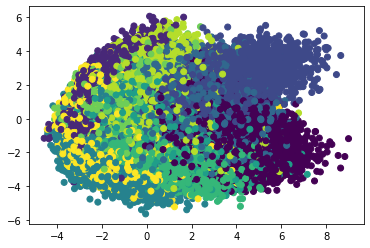

In [17]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c = all_labels)